In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json







In [2]:
# Read in data files for population data
total_pop = "Resources/population.csv"
west_pop = "Resources/westcoastpop.csv"
east_pop = "Resources/eastcoastpop.csv"

total_pop = pd.read_csv(total_pop) 
west_pop = pd.read_csv(west_pop)
east_pop = pd.read_csv(east_pop)

total_pop.index=['2014','2015','2016','2017','2018']
new_pop=total_pop.drop(['Unnamed: 0'],axis=1)

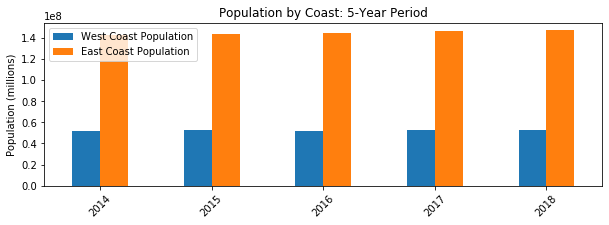

In [3]:
total_pop.drop(['Unnamed: 0'],axis=1).plot(kind="bar", figsize=(10,3), rot=45)
plt.title('Population by Coast: 5-Year Period')
plt.ylabel('Population (millions)')  
plt.savefig('TotP.png')
plt.show()

In [ ]:
# Read in the east coast GDP CSV
csv_file = pd.read_csv('Resources/GDP_East.csv', thousands=',')
east_data = pd.DataFrame(csv_file)
east_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']
east_data

In [ ]:
# Sum total of east coast GDP per year
east_sum = east_data.sum()
east_sum

In [ ]:
# Read in the west coast GDP CSV
csv_file = pd.read_csv('Resources/GDP_West.csv', thousands=',')
west_data = pd.DataFrame(csv_file)
west_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']
west_data

In [ ]:
# Sum total of west coast GDP per year
west_sum = west_data.sum()
west_df = pd.DataFrame(west_sum)
west_df

In [ ]:
# Combine the two into a total GDP summary table
sum_df = pd.DataFrame(east_sum)
sum_df.columns = ['East Coast']
sums_df = sum_df.join(west_df)
sums_df.columns = ['East Coast', 'West Coast']
sums_df = sums_df.T
del sums_df['State']
sums_df

In [ ]:
# Transform GDP Summary table for readability
sums_df = sums_df.T
sums_df

In [ ]:
# Summary East v West coast bar plot

labels = ['2014', '2015', '2016', '2017', '2018']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sums_df['East Coast'], width, label='East Coast')
rects2 = ax.bar(x + width/2, sums_df['West Coast'], width, label='West Coast')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total GDP in Millions of USD')
ax.set_title('Summary of GDP on Each Coast by Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [ ]:
# Open coastline CSV
csv_file = pd.read_csv("Resources/coastline.csv", thousands=",")
coast_df = pd.DataFrame(csv_file)

# Format the coastline Dataframe
coast_df.columns = ['State', 'Coastline']
coast_df['Coastline'] = coast_df['Coastline'].str.strip(' mi')
coast_df['Coastline'] = coast_df['Coastline'].str.replace(',' , '')
coast_df['Coastline'] = coast_df['Coastline'].astype(int)
coast_df

In [ ]:
# Barplot for coastline values
plt.bar(coast_df['State'], coast_df['Coastline'])
plt.xticks(rotation="vertical")
plt.ylabel("Coastline (mi)")
plt.xlabel("State")
plt.title("Coastline per State")
plt.show()